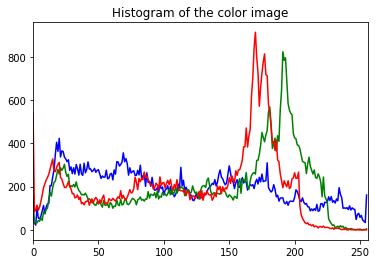

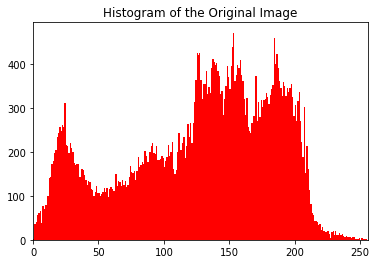

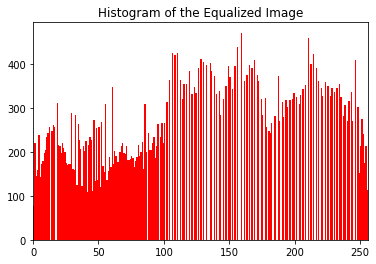

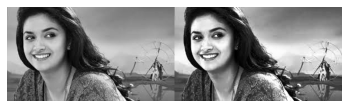

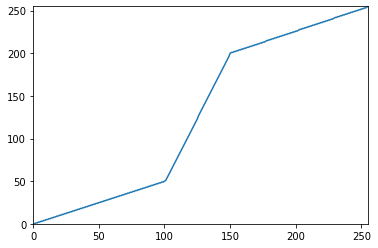

ipykernel_launcher:65: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
ipykernel_launcher:68: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


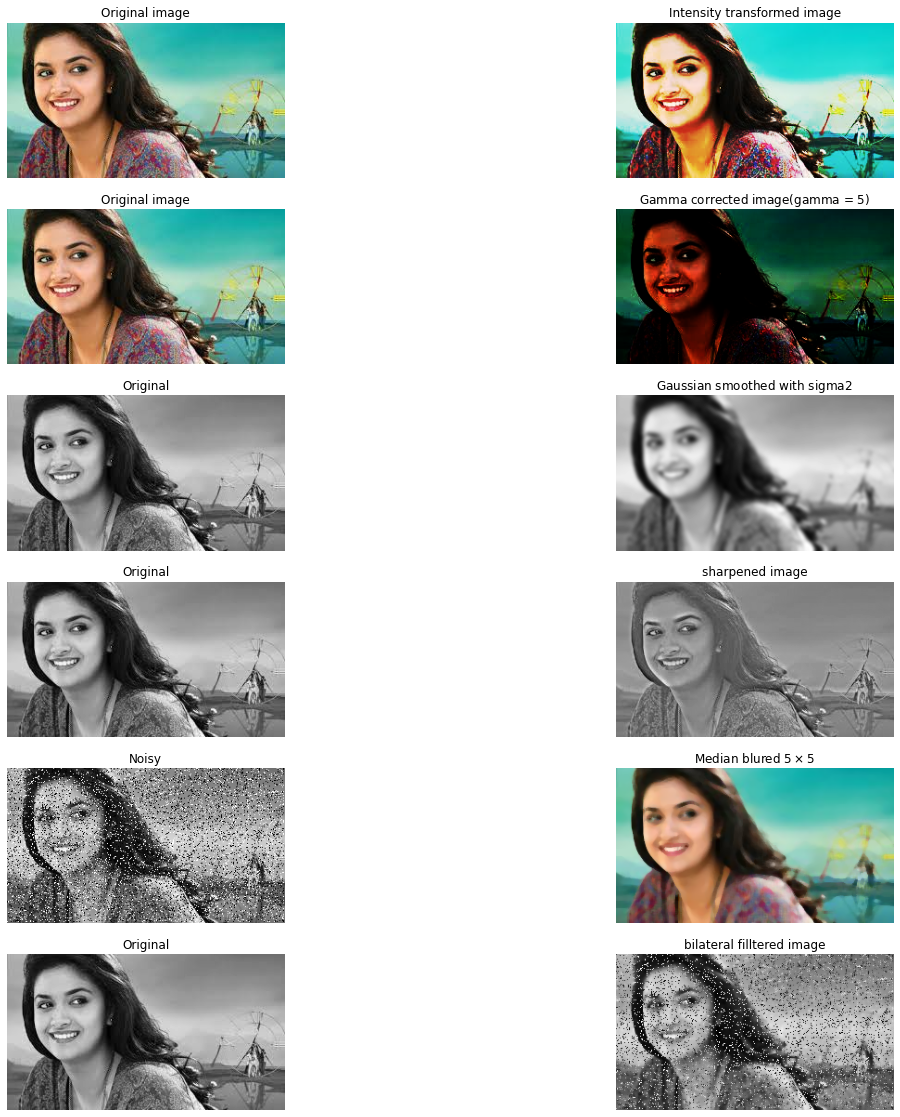

In [1]:
%matplotlib inline 
import numpy as np 
import cv2 as cv 
import matplotlib.pyplot as plt

image = cv.imread('./images/k1.jpg', cv.IMREAD_COLOR)

# a .histogram of color image
img = cv.cvtColor(image, cv.COLOR_BGR2RGB)
color = ('b', 'g', 'r')
for i, c in enumerate(color):
    hist = cv.calcHist([img], [i], None, [256],[0,256])
    plt.plot(hist, color = c), plt.xlim([0, 256])
plt.title("Histogram of the color image")
plt.show()

# b .Histogram equalization 
gray_img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
equalized_img = cv.equalizeHist(gray_img)

plt.hist(gray_img.flatten(), 256, [0,256], color = 'r')
plt.title('Histogram of the Original Image'), plt.xlim([0, 256])
plt.show()
plt.hist(equalized_img.flatten(), 256, [0,256], color = 'r')
plt.title('Histogram of the Equalized Image'), plt.xlim([0, 256])
plt.show()
result = np.hstack((gray_img, equalized_img))
plt.axis('off'), plt.imshow(result, cmap = 'gray'), plt.show()

# c .Intensity transformation 
c = np.array([(100,50), (150,200)])#coordinates where tranformation has changed

t1 = np.linspace(0, c[0,1], c[0,0]+1 -0) # valuse 0 to 50 with 101 points
t2 = np.linspace(c[0,1]+1, c[1,1], c[1,0] - c[0,0])
t3 = np.linspace(c[1,1]+1, 255, 255 - c[1,0])

transform = np.concatenate((t1,t2), axis = 0).astype('uint8')
transform = np.concatenate((transform,t3), axis = 0).astype('uint8')

plt.plot(transform) , plt.xlim(0,255), plt.ylim(0,255)
plt.show()
trans_img = cv.LUT(img, transform)

# d .Gamma correction
gamma = 5
tabel = np.array([(i/255)**gamma*255  for i in np.arange(0,256)]).astype(np.uint8)
trans = cv.LUT(img, tabel)

# e. Gaussian smmothing 
sigma = 2
gaussian_kernel = cv.getGaussianKernel(9, sigma)
gau_smoothed_img = cv.sepFilter2D(gray_img, -1, gaussian_kernel, gaussian_kernel, 
                 anchor = (-1, 1), delta = 0 , borderType = cv.BORDER_REPLICATE)

#f .Unsharp masking
diff = gray_img.astype('float32') - gau_smoothed_img.astype('float32')
sharpened_img = cv.addWeighted(gray_img.astype('float32') ,1.0, diff, 1.5,0)

def solt_pep_noisy(image):    
    s_vs_p = 0.5
    amount = 0.2
    out = np.copy(image)
    num_salt = np.ceil(amount*image.size*s_vs_p) # no.on salts
    coors = [np.random.randint(0, i-1, int(num_salt)) for i in image.shape]
    out[coors] = 255
    num_pepper = np.ceil(amount*image.size*(1-s_vs_p)) # no.on pepper
    coors = [np.random.randint(0, i-1, int(num_salt)) for i in image.shape]
    out[coors] = 0
    return out 

im_n = solt_pep_noisy(gray_img.astype('float32'))
#g.median filtering
median_blured_img = cv.medianBlur(img, 5)    
#h.bilateral filtering
bilateral_filltered_img = cv.bilateralFilter(im_n,5,75,75)


fig, ax = plt.subplots(6,2, sharex = 'all', sharey = 'all', figsize = (20,20)) 

ax[0,0].imshow(img), ax[0,1].imshow(trans_img)
ax[0,0].set_title("Original image"), ax[0,1].set_title("Intensity transformed image")
ax[0,0].axis('off'), ax[0,1].axis('off')

ax[1,0].imshow(img)
ax[1,1].imshow(trans)
ax[1,0].set_title("Original image"), ax[1,1].set_title(r"Gamma corrected image(gamma = ${}$)".format(gamma))
ax[1,0].axis('off'), ax[1,1].axis('off')
    
ax[2,0].imshow(gray_img, cmap = 'gray')
ax[2,0].set_title('Original')
ax[2,1].imshow(gau_smoothed_img, cmap = 'gray')
ax[2,1].set_title(r'Gaussian smoothed with sigma${0}$'.format(sigma))
ax[2,0].axis('off'), ax[2,1].axis('off')


ax[3,0].imshow(gray_img, cmap = 'gray')
ax[3,0].set_title('Original')
ax[3,1].imshow(sharpened_img, cmap = 'gray')
ax[3,1].set_title("sharpened image")
ax[3,0].axis('off'), ax[3,1].axis('off')


ax[4,0].imshow(im_n, cmap='gray')
ax[4,0].set_title('Noisy')
ax[4,1].imshow(median_blured_img, cmap = 'gray')
ax[4,1].set_title(r'Median blured ${0}\times {0}$'.format(5))
ax[4,0].axis('off'), ax[4,1].axis('off')


ax[5,0].imshow(gray_img, cmap='gray')
ax[5,0].set_title('Original')
ax[5,1].imshow(bilateral_filltered_img, cmap = 'gray')
ax[5,1].set_title("bilateral filltered image")
ax[5,0].axis('off'), ax[5,1].axis('off')



plt.show()




(256, 256)


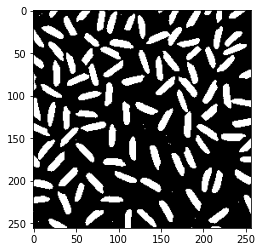

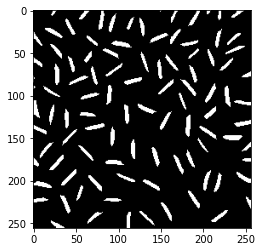

Number of rice grains 101


Text(0.5, 1.0, 'Color mapped image')

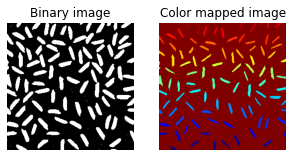

In [3]:
# RICE counting 
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

rice_img = cv.imread('./a01images/rice.png', cv.IMREAD_GRAYSCALE)
print(rice_img.shape)
# find local threshold based on a small region 
output_adapthresh = cv.adaptiveThreshold (rice_img, 255.0,
		cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 25, -20)
plt.imshow(output_adapthresh, cmap = 'gray')
plt.show()
# morphologial erosion - helps to remove conjoined grains
kernel = np.ones((4,4),np.uint8)
output_erosion = cv.erode(output_adapthresh, kernel)
plt.imshow(output_erosion, cmap = 'gray')
plt.show()

retval, labels, stats, centroids = cv.connectedComponentsWithStats(output_erosion)

print("Number of rice grains", retval)

#Apply a color map
color_mappped_img = cv.applyColorMap((labels/np.amax(labels)*255).astype("uint8"), cv.COLORMAP_JET)

fig, ax = plt.subplots(1,2, figsize = (5,5))
ax[0].imshow(output_adapthresh, cmap='gray'), ax[0].axis('off')
ax[1].imshow(color_mappped_img, cmap='gray'), ax[1].axis('off')
ax[0].set_title('Binary image'), 
ax[1].set_title('Color mapped image')





In [6]:
import cv2 as cv
import numpy as np 
from matplotlib import pyplot as plt

def zooming_image(img, zoom_method, factor):
    rows, cols = int(factor*img.shape[0]),  int(factor*img.shape[1])
    zoomed_img = np.zeros((rows, cols, img.shape[2]), dtype=img.dtype)
    
    if zoom_method == "nearest-neighbor" :
        for i in range(0, rows):
            for j in range(0, cols):   
                zoomed_img[i,j] = img[int(i/factor), int(j/factor)]
    
    if zoom_method == "bilinear interpolation":
        for i in range(0, rows):
            for j in range(0, cols):  
                #original 
                x, y = i/factor, j/factor
                x1 , y1 = int(x), int(y)
                x2, y2 = min(x1+1, img.shape[0]-1), min(y1+1, img.shape[1]-1)
                
                xf = x - x1
                yf = y - y1

                k = xf*img[x1, y1] + (1 - xf)*img[x2 ,y1]
                m = xf*img[x1, y2] + (1 - xf)*img[x2 , y2]
                zoomed_img[i,j] = yf*k + (1-yf )*m
    return zoomed_img

img = cv.imread('./a01images/im02small.png',cv.IMREAD_COLOR)
factor = 4
bilinear_zoomed_img = zooming_image(img, "bilinear interpolation", factor)
n_n_zoomed_img = zooming_image(img, "nearest-neighbor", factor)

orig = cv.imread('./a01images/im02.png',cv.IMREAD_COLOR)

mse_b = np.sum((orig.astype('float') - bilinear_zoomed_img.astype('float'))**2)/(orig.shape[0]*orig.shape[1])
mse_n = np.sum((orig.astype('float') - n_n_zoomed_img.astype('float'))**2)/(orig.shape[0]*orig.shape[1])
print("Bilinear MSE: {}, nearest-neighbor MSE: {}".format(mse_b, mse_n))


Bilinear MSE: 368.08457508680556, nearest-neighbor MSE: 79.33826215277777
